# CS519 Final Project
```
Authors:
    Brandon White <bjwhite3@illinois.edu>
    James Robertson
```


Object statistics
class                         cnt    on heap     size    total size    heap size
TList                         137        137      104         14248        14248
TObjectTable                    1          1       32            32           32
TROOT                           1          0      704           704            0
TPluginManager                  1          1       40            40           40
THashTable                      1          1       72            72           72
THashList                       1          1      112           112          112
TEnv                            1          1       56            56           56
TEnvRec                       154        154       96         14784        14784
TUnixSystem                     1          1      648           648          648
TOrdCollection                  5          5       72           360          360
--------------------------------------------------------------------------------
Total:   

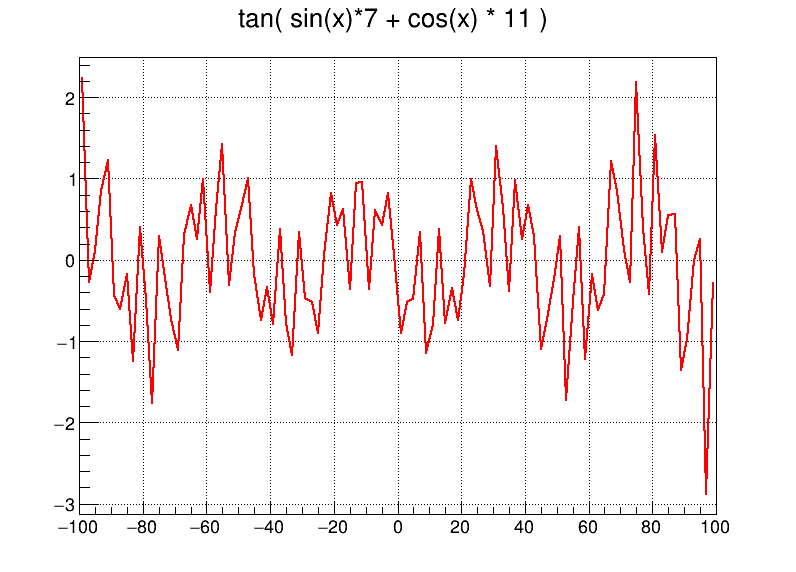

In [33]:
# Well I guess first we should prove we can do anything at all.

# We should REMOVE THIS BEFORE SUBMITTING!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Plotting the levels of care I give

import ROOT
from ROOT import TFormula, TF1, gROOT, gObjectTable

cares_canvas = ROOT.TCanvas("caresOverTime","Metaphorical cares as a Function of Time", 800, 600)

# Create a one dimensional function and draw it
plot = TF1( 'cares_given', 'tan( sin(x)*7 + cos(x) * 11 )', -100, 100 )
cares_canvas.SetGridx()
cares_canvas.SetGridy()
plot.Draw()
cares_canvas.Update()
 
# Print the list of objects known to ROOT
if ( gObjectTable ):
    gObjectTable.Print()

cares_canvas.Draw()

# Step 1 is to open up the file, and see what we have to work with.
```
SAM Dataset: prod_reco_R16-03-03-prod2reco.d_fd_numi_fhc_period1_v1_goodruns_prod2-snapshot
Filename: fardet_r00014512_s51_t00_R16-03-03-prod2reco.d_v1_data.reco.root
```

In [31]:
# ROOT Visualization Examples: https://root.cern.ch/doc/master/dir_a5bc9fd8c403f8cc582a0ace119a9c33.html

dataset = 'prod_reco_R16-03-03-prod2reco.d_fd_numi_fhc_period1_v1_goodruns_prod2-snapshot'
filename = 'fardet_r00014512_s51_t00_R16-03-03-prod2reco.d_v1_data.reco.root'

f = ROOT.TFile.Open(filename, "READ")

# The TTree class represents a columnar dataset: https://root.cern.ch/doc/master/classTTree.html
ttree = f.Get('Events')

print(f.ls())
#dir(ttree)

for thing in ttree:
    type(thing)
    print(thing)
    dir(thing)
    break
    
    
# Talk to steven calvez
# use hdf5 instead


None
Name: Events Title: 
TFile**		fardet_r00014512_s51_t00_R16-03-03-prod2reco.d_v1_data.reco.root	
 TFile*		fardet_r00014512_s51_t00_R16-03-03-prod2reco.d_v1_data.reco.root	
  OBJ: TTree	Events	 : 0 at: 0x557e69b6add0
  KEY: TTree	EventHistory;2	
  KEY: TTree	EventHistory;1	
  KEY: TTree	MetaData;2	
  KEY: TTree	MetaData;1	
  KEY: TTree	FileIndex;2	
  KEY: TTree	FileIndex;1	
  KEY: TTree	Parentage;2	
  KEY: TTree	Parentage;1	
  KEY: TTree	Events;2	
  KEY: TTree	Events;1	
  KEY: TTree	EventMetaData;2	
  KEY: TTree	EventMetaData;1	
  KEY: TTree	SubRuns;2	
  KEY: TTree	SubRuns;1	
  KEY: TTree	SubRunMetaData;2	
  KEY: TTree	SubRunMetaData;1	
  KEY: TTree	Runs;2	
  KEY: TTree	Runs;1	
  KEY: TTree	RunMetaData;2	
  KEY: TTree	RunMetaData;1	
  KEY: TTree	ResultsTree;2	
  KEY: TTree	ResultsTree;1	
  KEY: TTree	ResultsMetaData;2	
  KEY: TTree	ResultsMetaData;1	
  KEY: TKey	RootFileDB;1	sqlite3 database file


# Turns out .reco.root files are a bad way to store data for analysis due to the inherently sequential nature of the files. Also, the format of .reco.root files carries with it a depedency on the _art_ framewok.

# Instead, use HDF5 files for analsyis that were generated from .reco.root files by the HDFMaker software (which I helped write).